In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_excel('results.xlsx')

In [9]:
df

,model,speed,memory kb,accuracy,cross entropy loss,notes
0,baseline,143.80,136126.773,0.7201,0.102695,-
1,quantize linear,139.61,78277.298,0.7201,0.102704,"only linear layers, int8"
2,quantize linear,141.77,136129.072,0.7201,0.102695,"only linear layers, float16"
3,quantize convolotion and others,63.51,34067.257,0.7181,0.102900,"activation min max observer, uint8. weights mi..."
4,quantize convolotion and others,67.57,34276.185,0.7175,0.102797,"fbgemm: activation HistogramObserver, uint8. w..."
5,quantize convolotion and others,67.57,34067.193,0.7120,0.105772,"qnnpack: activation HistogramObserver, uint8. ..."
6,quantize convolotion and others,70.85,34067.253,0.7196,0.102835,"activation moving average min max observer, ui..."


In [20]:
def plot_result(df, metric):
    df = df.sort_values('memory kb')
    df['memory mb'] = df['memory kb'] / 1024
    plt.figure(figsize = (15,3))
    plt.plot(df.loc[df['model']!= 'baseline', 'memory mb'], df.loc[df['model']!= 'baseline', metric], '.--', markersize = 15, label = 'experiments', alpha = 0.8)
    plt.plot(df.loc[df['model']== 'baseline', 'memory mb'], df.loc[df['model']== 'baseline', metric], 'g.', markersize = 20, label = 'baseline', alpha = 0.8)
    plt.xscale('log')
    plt.title('quantization ' + metric + ' vs memory')
    plt.xlabel('memory mb')
    plt.ylabel(metric)
    plt.legend()

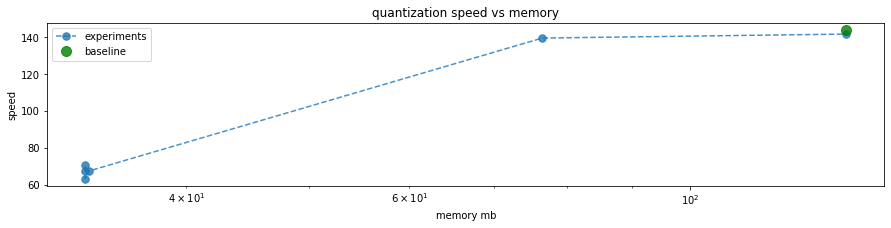

In [21]:
plot_result(df, 'speed')

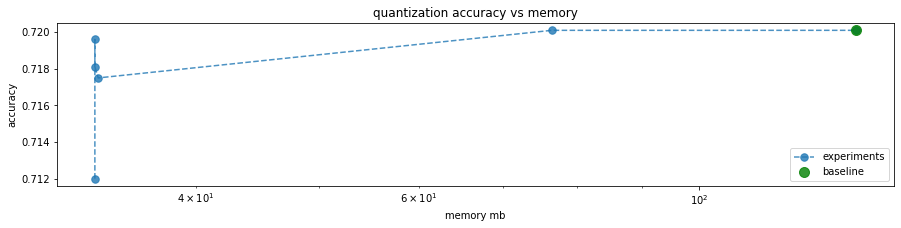

In [22]:
plot_result(df, 'accuracy')

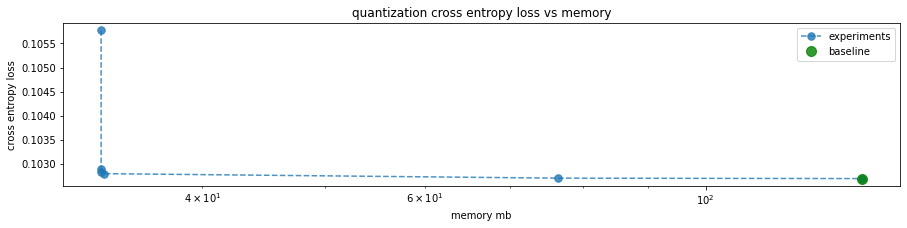

In [24]:
plot_result(df, 'cross entropy loss')